<a href="https://colab.research.google.com/github/Nyounggu/Basic_ML_DL/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0%2B%EB%94%A5%EB%9F%AC%EB%8B%9D_CHAPTER2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 농어의 무게를 예측하라

지도학습 알고리즘

> 분류 (저번시간까지 했음)

> 회귀 (regression)
- 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제
- 최근접 이웃 회귀 : 평균을 내서 타킷 찾음

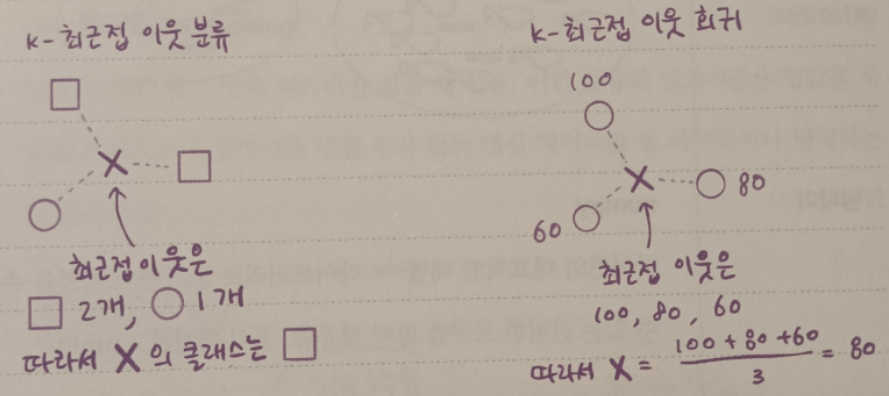

# 데이터 준비

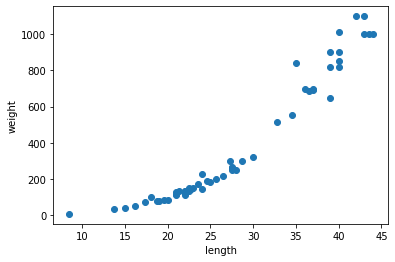

In [ ]:
# 농어의 길이만 사용

import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)  # x축, y축
plt.xlabel('length')
plt.ylabel('weight') 
plt.show()

In [ ]:
# 훈련 세트 준비
# sklearn의 train_test_split()함수를 사용해 train set과 test set으로 나누기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
print(train_input.shape, test_input.shape)

(42,) (14,)


In [ ]:
print(test_input)

[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]


In [ ]:
# reshape() 메서드로 2차원 배열로 바꾸기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

# 내가 reshape 후의 행의 개수를 모를 때 -1을 사용
# [1,2,3]로 크기가 (3,)인 배열을 reshape(-1,1) 한 배열의 크기는 (3,1) 

(42, 1) (14, 1)


In [ ]:
print(test_input)

[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


# 결정계수

> 결정계수(R^2) (coefficient of determination)
- 회귀모델에서 예측의 적합도를 0과 1 사이의 값으로 계산한 것으로 1에 가가울수록 완벽함

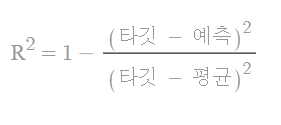

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

# 회귀 모델!
# 분류 모델은 KNeighborsClasssifier

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

knr.score(test_input, test_target)
# R^2 = 1 에 가까울수록 좋은 회귀모델

0.992809406101064

In [ ]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

# 평균 절댓값 오차 : 약 19g 정도 차이가 난다

19.157142857142862


# 과대적합 vs 과소적합

- 과대적합 : 모델의 train set 점수가 test set 점수보다 훨씬 높은 경우
- 과소적합 : 모델의 train set 점수와 test set 점수가 모두 동일하게 낮거나 test set 성능이 오히려 더 높은 경우

In [ ]:
# 위에서 훈련한 모델을 사용해 train set, test set의 결정계수값 구하기

knr.score(train_input, train_target)

0.9698823289099254

In [ ]:
knr.score(test_input, test_target)

0.992809406101064

In [ ]:
# test에서 더 높은 score 받음
# 보통은 train이 더 높은 score 받음
# 이런경우 과소적합 됐다고 한다 
# 반대로, 예를 들어 train이 0.99, test가 0.6으로 나온 경우
# 과대적합 됐다고 한다

In [ ]:
# 이웃 개수 줄이기
# 과소적합 문제를 해결하는 방법

# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3  # 원래는 5였음 (기본값)

# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


In [ ]:
# 과소적합과 과대적합의 균형점을 찾았다!

# 확인문제

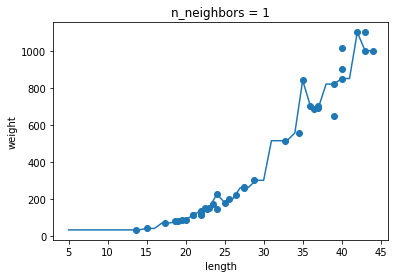

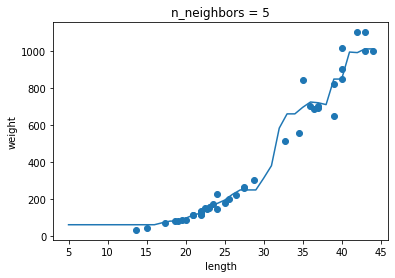

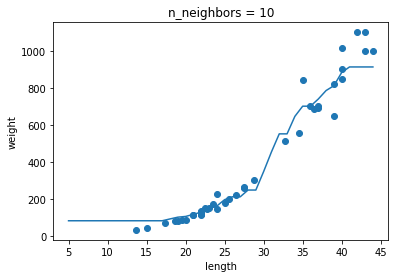

In [ ]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1,1)

# n = 1, 5, 10일 때 예측결과를 그래프로 그립니다
for n in [1,5,10]:
  # 모델 훈련
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  # 지정한 범위 x에 대한 예측 구하기
  prediction = knr.predict(x)
  # 훈련 세트와 예측결과 그래프 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

# n이 커질수록 모델이 단순해짐

# 선형회귀

## k-최근접 이웃의 한계

In [ ]:
# 아주 큰 농어

# k = 3 으로 지정
knr.n_neighbors = 3         
knr.fit(train_input, train_target)

print(knr.predict([[50]]))

[1033.33333333]


50cm 농어의 무게를 1033g 정도로 예측함 \
(하지만 실제 이 농어의 무게는 더 많이 나감)

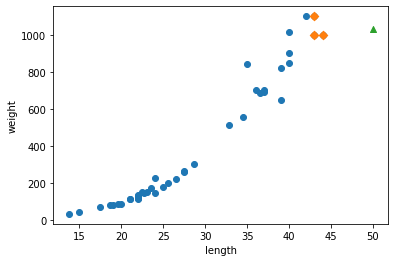

[[[44.]
  [43.]
  [43.]]]
[[1000. 1000. 1100.]]


In [ ]:
# 50cm 농어의 이웃을 구합니다. 
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt. scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(train_input[indexes])
print(train_target[indexes])

# 훈련 세트 외의 크기의 농어는 무게를 예측하기가 힘들다
# 이 문제를 해결하기 위해 사용 -> 선형회귀

In [ ]:
print(np.mean(train_target[indexes]))
# k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균한다는 것을 알 수 있음

1033.3333333333333


In [ ]:
print(knr.predict([[100]]))
# 새로운 샘플이 train set의 범위를 벗어나면 엉뚱한 값을 예측할 수 있음
# 길이가 100cm인 농어도 1033g으로 예측함!!

[1033.33333333]


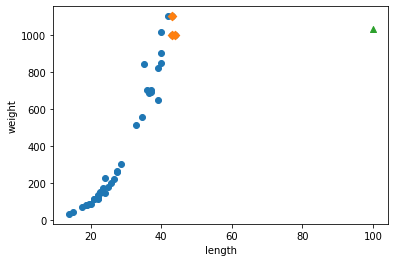

In [ ]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트와 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))
print(lr.coef_, lr.intercept_) 

# 기울기 : coef, y절편 : intercept
# ax + b 에서 a = lr.coef_, b = lr.intercept_ 이다

[1241.83860323]
[39.01714496] -709.0186449535477


> 가중치(또는 계수) = weight(또는 coeficient)
- 선형회귀가 학습한 직선의 기울기를 종종 가중치 또는 계수라고 함

> 모델 파라미터(model parameter)
- coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 의미

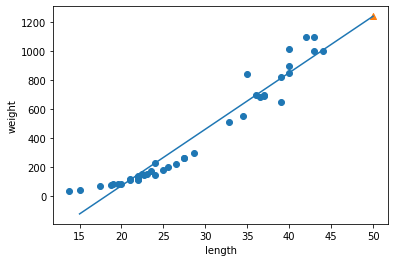

In [ ]:
# 학습한 직선 그리기

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다
# ax + b 에서 a = lr.coef_, b = lr.intercept_ 이다 -> 참고
plt.plot([15,50], [lr.coef_*15 + lr.intercept_, lr.coef_*50 + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


## 다항회귀
다항식을 사용하여 특성과 타깃 사이의 관계를 나타낸 선형회귀

In [ ]:
# 2차 방정식의 그래프를 그리기 위해 길이를 제곱한 항이 train set에 추가되어야 함
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

In [ ]:
# train_poly를 사용해 선형회귀모델 다시 훈련

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


### 무게 = ax^2 + bx + c
여기서는,\
a = 1.01433211\
b = -21.5579\
c = 116.0502 

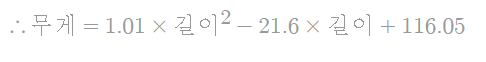

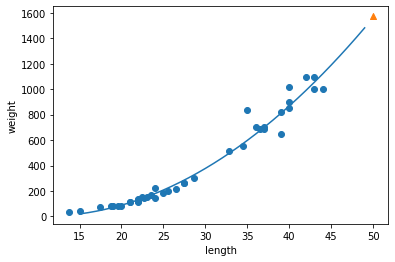

In [ ]:
# 학습한 직선 그리기

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15,50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# R^2 점수
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 특성 공학과 규제

> 다중회귀(multiple regression)
- 여러 개의 특성을 사용한 선형회귀

In [ ]:
# 판다스로 데이터 준비
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

#print(df) -> 3가지 특성을 가지고 있는 perch_full 데이터..
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
print(perch_weight)

[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


In [ ]:
# perch_full과 perch_weight를 train set과 test set로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

> 변환기(transformer)
- 특성을 만들거나 전처리하는 사이킷런의 클래스로 타깃 데이터 없이 입력 데이터를 변환함

> 특성공학
- 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업
- 물고기의 특성으로 길이, 높이, 두께의 3개의 특성이 있다고 가정
- 여기서 각각의 특성을 제곱한 특성을 만들고 (길이^2, 높이^2, 두께^2)
- 또한 각각의 특성끼리 곱한 특성을 만들어 (길이x높이, 길이x두께, 높이x두께)
- 9개의 특성을 만들 수 있음 (길이, 높이, 두께, 길이^2, 높이^2, 두께^2, 길이x높이, 길이x두께, 높이x두께)
- ### 특성이 많을수록 선형회귀는 엄청난 효과를 냄



In [ ]:
# 사이킷런의 변환기

from sklearn.preprocessing import PolynomialFeatures

# degree=2 -> degree : 최고차수 / 기본값 : 2
# interaction_only : True 이면 거듭제곱 항은 제외, 특성 간의 곱셈 항만 추가
# interactino_only 기본값 : False
poly = PolynomialFeatures()
poly.fit([[2,3]])

# 1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


- fit() : 새롭게 만들 특성 조합을 찾고
- trainsform() : 실제로 데이터를 변환함

>선형 방정식 : a x 길이 + b x 높이 + c x 두께 + d x 1

- 선형 방정식의 절편은 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있음
- 이렇게 놓고 보면 특성은 (길이, 높이, 두께, 1)이 됨
- 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 (intercept_) 굳이 1인 특성을 만들 필요가 없음
- include_bias = False 를 하게 되면 1을 제외한 특성만 반환함
- (include_bias = False로 지정하지 않아도 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시함)

In [ ]:
# 절편을 위한 항이 제거되고 특성과 제곱과 특성끼리 곱한 항만 추가되었음
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 9)


In [ ]:
# get_feature_names() 메서드를 호출하면 각각의 특성이 어떤 입력의 조합인지 알려줌
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

## 다중회귀모델 훈련하기

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

(42, 55)
0.9999999999991097
-144.40579242684848


- train set의 점수는 0.9999로 거의 완벽한 점수이지만 test set의 점수는 -144.405로 음수가 나왔음 \

- ∴ ​특성의 개수를 크게 늘리면 선형 모델은 아주 강력해져 train set에 대해 거의 완벽하게 학습을 하지만 train set에 너무 과대적합되므로 test set에서는 형편없는 점수를 만듦!!

# 규제

> 규제(regularization)
- 머신러닝 모델이 train set을 너무 과도하게 학습하지 못하도록 훼방하는 것을 말함 
- 즉, 모델이 train set에 과대적합되지 않도록 만듦

In [ ]:
# 규제 전에 표준화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 선형회귀모델에 규제를 추가한 모델을 릿지와 라쏘라고 부름
- 릿지 : 계수를 제곱한 값을 기준으로 규제를 적용
- 라쏘 : 계수의 절댓값을 기준으로 규제를 적용

일반적으로 릿지를 조금 더 선호함

> 릿지 회귀 (ridge regression)
- 규제가 있는 선형회귀모델 중 하나로 모델 객체를 만들때 alpha 매개변수로 규제의 강도를 조절함
- alpha값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도하여 과대적합을 완화시킴

> 하이퍼파라미터 (hyperparameter)
- 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터 (ex : alpha 값)

## 릿지회귀

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615391


In [ ]:
# 적절한 alpha 값을 찾는 한 가지 방법은 
# alpha 값에 대한 R^2값의 그래프를 그려보는 것
import matplotlib.pyplot as plt

# score() 메서드의 결과를 저장할 리스트 만들기
rain_score = []
test_score = []

In [ ]:
# 적절한 규제 강도 찾기

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델을 만듭니다
  ridge = Ridge(alpha=alpha)
  # 릿지 모델을 훈련합니다
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장합니다
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))


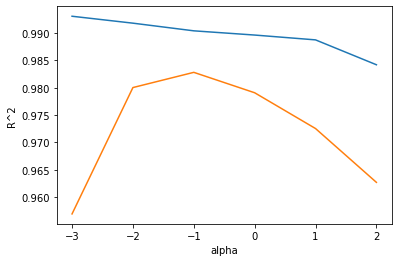

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

-> 적절한 alpha 값은 두 그래프가 가장 가갑고 test set의 점수가 가장 높은 -1이다.\
-> 그래서 alpha 값을 0.1로 하여 최종 모델을 훈련함

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


-> 이 모델은 train set과 test set의 점수가 비슷하게 모두 높고 과대적합과 과소적합 사이에서 균형을 맞추고 있음

## 라쏘회귀

> 라쏘회귀 (lasso regression)
- 또 다른 규제가 있는 선형회귀모델로 alpha 매개변수로 규제의 강도를 조절함
- 릿지와 달리 계수 값을 아예 0으로 만들 수도 있음

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list :
  # 라쏘 모델을 만듭니다
  lasso = Lasso(alpha=alpha, max_iter=10000)
  # 라쏘 모델을 훈련합니다
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장합니다
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


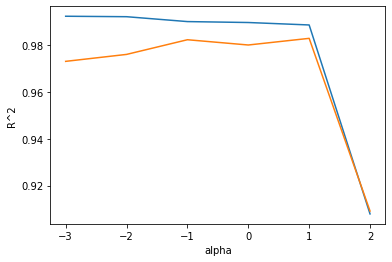

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() 
# 파란색 : train set
# 주황색 : test set

-> 이 그래프도 왼쪽은 과대적합을 보여주고 있고, 오른쪽으로 갈수록 train set과 test set의 점수가 좁혀지고 있음\
-> 라쏘 모델에서 최적의 alpha 값은 1이다. 그래서 alpha 값을 10(=10^1)로 하여 최종 모델을 훈련함

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
# 계수가 0인 것의 개수
print(np.sum(lasso.coef_ == 0))

40
